# "Digitalización de una carga doméstica"

## Postítulo "Digital Energy", Máster Smart Energy

## Módulo: Digitalización de la Energía

## Alumno: Max Antonio Missene Montecinos


### Objetivo:

#### Crear un código en Python que permita extraer datos (precio PVPC) desde la API de REE y posteriormente, graficarlos.

#### El primer paso que se realizará en el desarrollo del presente trabajo, será importar las librerías y funciones de librerías que utilizaremos a lo largo del código.

In [1]:
# Se importan las librerías necesarias
import pandas as pd
import requests 
import json
import datetime
import matplotlib
import matplotlib.pyplot as plt 

In [2]:
# Código para definir la información que irá en el "request"

endpoint = 'https://apidatos.ree.es' #Ruta de acceso al la API de REE 
# en general
get_archives = '/es/datos/mercados/precios-mercados-tiempo-real' #Ruta
# de acceso particular en la API de REE para obtener los precios
headers = {'Accept': 'application/json', 
           'Content-Type': 'application/json',#Formato que extraeremos,
# en este caso "json"
           'Host': 'apidatos.ree.es', #Ruta del servidor
          }
params = {'start_date': '2022-06-07T00:00', 'end_date': '2022-06-07T23:00', 'time_trunc':'hour'}
#Parametros particulares del intervalo de fechas que se extraerán datos 
# y cada cuánto tiempo.

In [3]:
# Con los parámetros definidos anteriormente, mediante la función 
# "request.get" es posible realizar la pregunta a la API.
request = requests.get(endpoint+get_archives, headers=headers, params=params)

In [4]:
#Se obtiene la respusta de la API. Esta consiste en un número que da
# información.
#En este caso, se espera un 200 para tener un acceso correcto a los datos.
request

<Response [200]>

In [5]:
# Se define el estatus de la conexión con la API.
status = request.status_code

In [6]:
#Se verifica el estado del código.
if status < 200:
    print('informational')
elif status >= 200 and status < 300:
    print('Connection is established')
elif status >= 300 and status < 400:
    print('redirection')
elif status >= 400 and status < 500:
    print('client error')
else:
    print('server error')

Connection is established


In [7]:
# Mediante la siguiente función se guarda la información extraída 
# de la API en formato json, en "data".
data = request.json()
data

{'data': {'type': 'Precios mercado peninsular en tiempo real',
  'id': 'mer13',
  'attributes': {'title': 'Precios mercado peninsular en tiempo real',
   'last-update': '2022-06-06T20:17:50.000+02:00',
   'description': None},
  'meta': {'cache-control': {'cache': 'MISS'}}},
 'included': [{'type': 'PVPC (€/MWh)',
   'id': '1001',
   'groupId': None,
   'attributes': {'title': 'PVPC (€/MWh)',
    'description': None,
    'color': '#ffcf09',
    'type': None,
    'magnitude': 'price',
    'composite': False,
    'last-update': '2022-06-06T20:17:50.000+02:00',
    'values': [{'value': 252.86,
      'percentage': 0.5491226546212647,
      'datetime': '2022-06-07T00:00:00.000+02:00'},
     {'value': 234.24,
      'percentage': 0.5509714447005692,
      'datetime': '2022-06-07T01:00:00.000+02:00'},
     {'value': 221.16,
      'percentage': 0.5523062707589341,
      'datetime': '2022-06-07T02:00:00.000+02:00'},
     {'value': 218.07,
      'percentage': 0.5533788413226076,
      'datetime': 

In [8]:
# Se aprecia que "data" es un diccionario, por lo cual se irá acotando
# la información a la variable que contiene el precio PVPC.
# Dicho información se encuentra en "included"
data['included']

[{'type': 'PVPC (€/MWh)',
  'id': '1001',
  'groupId': None,
  'attributes': {'title': 'PVPC (€/MWh)',
   'description': None,
   'color': '#ffcf09',
   'type': None,
   'magnitude': 'price',
   'composite': False,
   'last-update': '2022-06-06T20:17:50.000+02:00',
   'values': [{'value': 252.86,
     'percentage': 0.5491226546212647,
     'datetime': '2022-06-07T00:00:00.000+02:00'},
    {'value': 234.24,
     'percentage': 0.5509714447005692,
     'datetime': '2022-06-07T01:00:00.000+02:00'},
    {'value': 221.16,
     'percentage': 0.5523062707589341,
     'datetime': '2022-06-07T02:00:00.000+02:00'},
    {'value': 218.07,
     'percentage': 0.5533788413226076,
     'datetime': '2022-06-07T03:00:00.000+02:00'},
    {'value': 216.64,
     'percentage': 0.5535143974041238,
     'datetime': '2022-06-07T04:00:00.000+02:00'},
    {'value': 215.36,
     'percentage': 0.5520494219579093,
     'datetime': '2022-06-07T05:00:00.000+02:00'},
    {'value': 213.23,
     'percentage': 0.548247756

In [9]:
# Es posible apreciar que la información necesaria está en la primera
# posición del archivo, la cual se extraen en "data1".
data1 = data['included'][0]
# Se sigue acotando la información la cual se encuentra en "attributes" 
# de data1, con esa información se crea "data2".
data2 = data1['attributes']

In [10]:
# Se crea una lista para precios y se filtra la información sólo de
# "values".
prices = []
prices = data2['values']
prices

[{'value': 252.86,
  'percentage': 0.5491226546212647,
  'datetime': '2022-06-07T00:00:00.000+02:00'},
 {'value': 234.24,
  'percentage': 0.5509714447005692,
  'datetime': '2022-06-07T01:00:00.000+02:00'},
 {'value': 221.16,
  'percentage': 0.5523062707589341,
  'datetime': '2022-06-07T02:00:00.000+02:00'},
 {'value': 218.07,
  'percentage': 0.5533788413226076,
  'datetime': '2022-06-07T03:00:00.000+02:00'},
 {'value': 216.64,
  'percentage': 0.5535143974041238,
  'datetime': '2022-06-07T04:00:00.000+02:00'},
 {'value': 215.36,
  'percentage': 0.5520494219579093,
  'datetime': '2022-06-07T05:00:00.000+02:00'},
 {'value': 213.23,
  'percentage': 0.548247756665724,
  'datetime': '2022-06-07T06:00:00.000+02:00'},
 {'value': 261.55,
  'percentage': 0.5466268182578164,
  'datetime': '2022-06-07T07:00:00.000+02:00'},
 {'value': 291.22,
  'percentage': 0.5695232135174249,
  'datetime': '2022-06-07T08:00:00.000+02:00'},
 {'value': 278.49,
  'percentage': 0.5689507232164747,
  'datetime': '2022

In [11]:
# Convertimos dicha información e dataframe para un tratamiento más fácil.
DataFinal=pd.DataFrame(prices) 
DataFinal.head() # Observamos sus primeras 5 filas

,value,percentage,datetime
0,252.86,0.549123,2022-06-07T00:00:00.000+02:00
1,234.24,0.550971,2022-06-07T01:00:00.000+02:00
2,221.16,0.552306,2022-06-07T02:00:00.000+02:00
3,218.07,0.553379,2022-06-07T03:00:00.000+02:00
4,216.64,0.553514,2022-06-07T04:00:00.000+02:00


In [12]:
# Se verifica el tipo de cada variable.
DataFinal.dtypes
#Se aprecia que la variable datetime es un "object".

value         float64
percentage    float64
datetime       object
dtype: object

In [13]:
# La columna "datetime" se convierte en valores con formato "datetime".
DataFinal['datetime'] = pd.to_datetime(DataFinal['datetime'])
# Se verifica el éxito del a modificación:
DataFinal.dtypes

value                                       float64
percentage                                  float64
datetime      datetime64[ns, pytz.FixedOffset(120)]
dtype: object

In [14]:
# Se crea una columna sólo con las horas de la información de datetime,
# para graficar.
DataFinal['Horas'] = DataFinal['datetime'].dt.hour

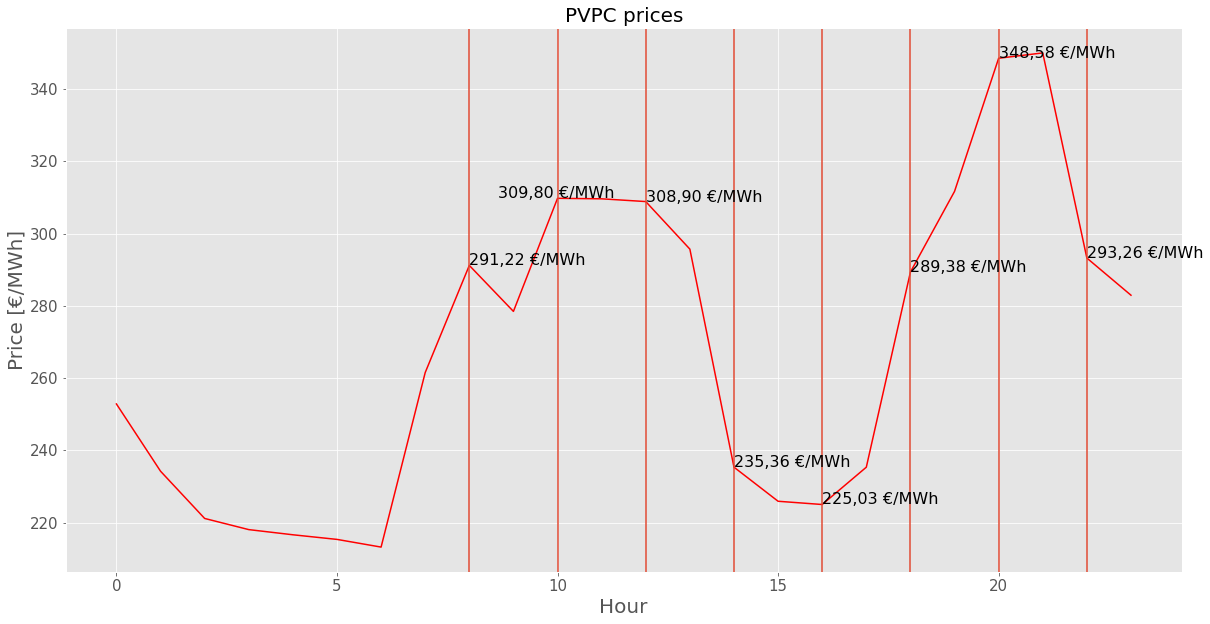

In [124]:
# Se grafica el precio PVPC en función de las horas del día, de la
# información extraída de la API de REE.
matplotlib.rc('xtick', labelsize=15)     
matplotlib.rc('ytick', labelsize=15)

plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.plot(DataFinal['Horas'], DataFinal['value'],'r',linewidth=1.5)
plt.title(f"PVPC prices", fontsize=20)
plt.xlabel('Hour',fontsize=20 )
plt.ylabel('Price [€/MWh]',fontsize=20)
plt.axvline(x=8, ymin=0, ymax=1)
plt.annotate('291,22 €/MWh',
            xy=(8,291.22), 
            xytext=(0, 0), textcoords='offset points', fontsize=16)
plt.axvline(x=10, ymin=0, ymax=1)
plt.annotate('309,80 €/MWh',
            xy=(10,309.80), 
            xytext=(-60, 0), textcoords='offset points', fontsize=16)
plt.axvline(x=12, ymin=0, ymax=1)
plt.annotate('308,90 €/MWh',
            xy=(12,308.90), 
            xytext=(0, 0), textcoords='offset points', fontsize=16)
plt.axvline(x=14, ymin=0, ymax=1)
plt.annotate('235,36 €/MWh',
            xy=(14,235.36), 
            xytext=(0, 0), textcoords='offset points', fontsize=16)
plt.axvline(x=16, ymin=0, ymax=1)
plt.annotate('225,03 €/MWh',
            xy=(16,225.2), 
            xytext=(0, 0), textcoords='offset points', fontsize=16)
plt.axvline(x=18, ymin=0, ymax=1)
plt.annotate('289,38 €/MWh',
            xy=(18,289.38), 
            xytext=(0, 0), textcoords='offset points', fontsize=16)
plt.axvline(x=20, ymin=0, ymax=1)
plt.annotate('348,58 €/MWh',
            xy=(20,348.58), 
            xytext=(0, 0), textcoords='offset points', fontsize=16)
plt.axvline(x=22, ymin=0, ymax=1)
plt.annotate('293,26 €/MWh',
            xy=(22,293.26), 
            xytext=(0, 0), textcoords='offset points', fontsize=16)
plt.show()

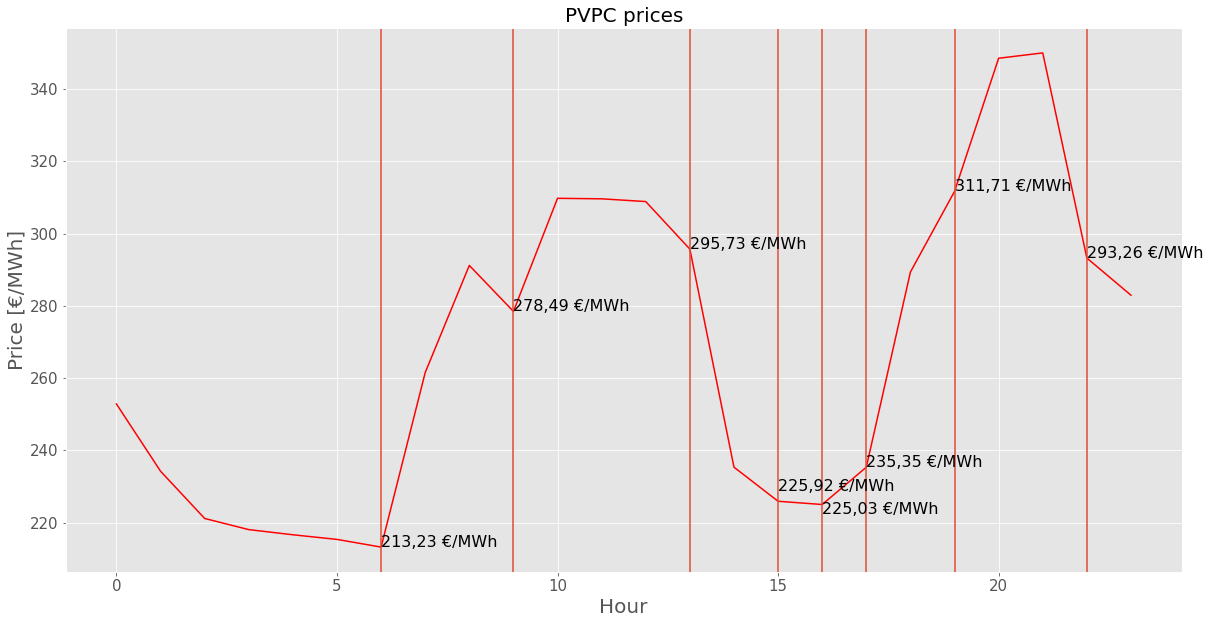

In [131]:
# Se grafica el precio PVPC en función de las horas del día, de la
# información extraída de la API de REE.
matplotlib.rc('xtick', labelsize=15)     
matplotlib.rc('ytick', labelsize=15)

plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.plot(DataFinal['Horas'], DataFinal['value'],'r',linewidth=1.5)
plt.title(f"PVPC prices", fontsize=20)
plt.xlabel('Hour',fontsize=20 )
plt.ylabel('Price [€/MWh]',fontsize=20)
plt.axvline(x=6, ymin=0, ymax=1)
plt.annotate('213,23 €/MWh',
            xy=(6,213.23), 
            xytext=(0, 0), textcoords='offset points', fontsize=16)
plt.axvline(x=9, ymin=0, ymax=1)
plt.annotate('278,49 €/MWh',
            xy=(9,278.49), 
            xytext=(0, 0), textcoords='offset points', fontsize=16)
plt.axvline(x=13, ymin=0, ymax=1)
plt.annotate('295,73 €/MWh',
            xy=(13,295.73), 
            xytext=(0, 0), textcoords='offset points', fontsize=16)
plt.axvline(x=15, ymin=0, ymax=1)
plt.annotate('225,92 €/MWh',
            xy=(15,225.92), 
            xytext=(0, +10), textcoords='offset points', fontsize=16)
plt.axvline(x=16, ymin=0, ymax=1)
plt.annotate('225,03 €/MWh',
            xy=(16,225.2), 
            xytext=(0, -10), textcoords='offset points', fontsize=16)
plt.axvline(x=17, ymin=0, ymax=1)
plt.annotate('235,35 €/MWh',
            xy=(17,235.35), 
            xytext=(0, 0), textcoords='offset points', fontsize=16)
plt.axvline(x=19, ymin=0, ymax=1)
plt.annotate('311,71 €/MWh',
            xy=(19,311.71), 
            xytext=(0, 0), textcoords='offset points', fontsize=16)
plt.axvline(x=22, ymin=0, ymax=1)
plt.annotate('293,26 €/MWh',
            xy=(22,293.26), 
            xytext=(0, 0), textcoords='offset points', fontsize=16)
plt.show()

In [16]:
import plotly.offline as py;
from plotly import tools;
import plotly.graph_objs as go;
from ipywidgets import widgets;
from ipywidgets import interact;
import warnings
warnings.filterwarnings('ignore')
py.init_notebook_mode(connected= True)

In [22]:
fig = go.Figure(
    data=[
        go.Line(x=DataFinal['Horas'][0:12*75],
                y=DataFinal['value'][0:12*75], name="Prices")
    ],
    layout=go.Layout(
        title=dict(text="PVPC prices 07/06/2022"),
        xaxis=dict(title='Hour'),
        yaxis=dict(title='Price [€/MWh]')
    )
)
fig.show()